In [567]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [568]:
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

In [569]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [570]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [571]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
match_id            179078 non-null int64
inning              179078 non-null int64
batting_team        179078 non-null object
bowling_team        179078 non-null object
over                179078 non-null int64
ball                179078 non-null int64
batsman             179078 non-null object
non_striker         179078 non-null object
bowler              179078 non-null object
is_super_over       179078 non-null int64
wide_runs           179078 non-null int64
bye_runs            179078 non-null int64
legbye_runs         179078 non-null int64
noball_runs         179078 non-null int64
penalty_runs        179078 non-null int64
batsman_runs        179078 non-null int64
extra_runs          179078 non-null int64
total_runs          179078 non-null int64
player_dismissed    8834 non-null object
dismissal_kind      8834 non-null object
fielder             6448 non-null object
dtype

In [572]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [573]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [574]:
matches.dtypes

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [575]:
matches[matches.isnull().any(axis=1)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,634,2016,Delhi,2016-05-25,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Sunrisers Hyderabad,22,0,MC Henriques,Feroz Shah Kotla,M Erasmus,C Shamshuddin,NaN
634,635,2016,Delhi,2016-05-27,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,4,DA Warner,Feroz Shah Kotla,M Erasmus,CK Nandan,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [576]:
matches.isnull().sum(axis=0)

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [577]:
empty = (matches == '').sum(axis=0)


C:\Anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [578]:
print(empty)

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64


In [579]:
space = (matches == ' ').sum(axis=0)
print(space)

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64


In [580]:
nan = (matches == 'nan').sum(axis=0)
print(nan)

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64


In [581]:
NaN = (matches == 'Nan').sum(axis=0)
print(NaN)

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64


In [582]:
city_obj = {"city": {"Ahmedabad": "Jaipur", "Dharamsala": "Chandigarh", 
                    "Indore": "Chandigarh", "Kanpur":"Rajkot","Raipur":"Delhi",
                    "Nagpur":"Hyderabad","Visakhapatnam":"Hyderabad"}}


In [583]:
matches.replace(city_obj, inplace =True)
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Chandigarh,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [584]:
matches.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Chandigarh', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Jaipur', 'Chennai', 'Cape Town',
       'Port Elizabeth', 'Durban', 'Centurion', 'East London',
       'Johannesburg', 'Kimberley', 'Bloemfontein', 'Cuttack', 'Kochi',
       'Ranchi', 'Abu Dhabi', 'Sharjah', nan, 'Mohali', 'Bengaluru'],
      dtype=object)

In [585]:
matches.shape

(756, 18)

**Converting venues to respective home venues**

In [586]:
matches.update(matches.loc[(matches['city'] == 'Cuttack') & (matches['season'] == 2010)].replace('Cuttack','Hyderabad'))
matches.update(matches.loc[(matches['city'] == 'Cuttack') & (matches['season'] == 2012)].replace('Cuttack','Hyderabad'))
matches.update(matches.loc[(matches['city'] == 'Cuttack') & (matches['season'] == 2014)].replace('Cuttack','Kolkata'))
matches.update(matches.loc[(matches['city'] == 'Ranchi') & (matches['season'] == 2013)].replace('Ranchi','Kolkata'))
matches.update(matches.loc[(matches['city'] == 'Ranchi') & (matches['season'] == 2014)].replace('Ranchi','Chennai'))
matches.update(matches.loc[(matches['city'] == 'Ranchi') & (matches['season'] == 2015)].replace('Ranchi','Chennai'))


In [587]:
matches.update(matches.loc[(matches['city'] == 'Hyderabad') & (matches['season'] == 2015)].replace('Hyderabad','Hyderabad_DC'))
matches.update(matches.loc[(matches['city'] == 'Hyderabad') & (matches['season'] == 2015)].replace('Hyderabad','Hyderabad_DC'))
matches.update(matches.loc[(matches['city'] == 'Hyderabad') & (matches['season'] == 2015)].replace('Hyderabad','Hyderabad_DC'))
matches.update(matches.loc[(matches['city'] == 'Pune') & (matches['season'] == 2012)].replace('Pune','Pune_PW'))
matches.update(matches.loc[(matches['city'] == 'Pune') & (matches['season'] == 2013)].replace('Pune','Pune_PW'))
matches.update(matches.loc[(matches['city'] == 'Pune') & (matches['season'] == 2016)].replace('Pune','Pune_RPS'))
matches.update(matches.loc[(matches['city'] == 'Pune') & (matches['season'] == 2017)].replace('Pune','Pune_RPS') )

**All the matches that were played abroad are being considered away**

In [588]:
matches.update(matches.loc[matches['city'] == 'Cape Town'].replace('Cape Town', 'away'))
matches.update(matches.loc[matches['city'] == 'Port Elizabeth'].replace('Port Elizabeth', 'away'))
matches.update(matches.loc[matches['city'] == 'Durban'].replace('Durban', 'away'))
matches.update(matches.loc[matches['city'] == 'Centurion'].replace('Centurion', 'away'))
matches.update(matches.loc[matches['city'] == 'East London'].replace('East London', 'away'))
matches.update(matches.loc[matches['city'] == 'Johannesburg'].replace('Johannesburg', 'away'))
matches.update(matches.loc[matches['city'] == 'Kimberley'].replace('Kimberley', 'away'))
matches.update(matches.loc[matches['city'] == 'Bloemfontein'].replace('Bloemfontein', 'away'))
matches.update(matches.loc[matches['city'] == 'Abu Dhabi'].replace('Abu Dhabi', 'away'))
matches.update(matches.loc[matches['city'] == 'Sharjah'].replace('Sharjah', 'away'))
matches.update(matches.loc[matches['city'] == 'Bengaluru'].replace('Bengaluru', 'Bangalore'))
matches.update(matches.loc[matches['city'] == 'Chandigarh'].replace('Chandigarh', 'Mohali'))

In [589]:
team1_obj = {"team1": {"Delhi Capitals": "Delhi Daredevils"}}
matches.replace(team1_obj, inplace =True)

team2_obj= {"team2": {"Delhi Capitals": "Delhi Daredevils"}}
matches.replace(team2_obj, inplace =True)

winner_obj= {"winner": {"Delhi Capitals": "Delhi Daredevils"}}
matches.replace(winner_obj, inplace =True)

toss_winner_obj= {"toss_winner": {"Delhi Capitals": "Delhi Daredevils"}}
matches.replace(toss_winner_obj, inplace =True)


In [590]:
matches.city.unique()

array(['Hyderabad', 'Pune_RPS', 'Rajkot', 'Mohali', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Jaipur', 'Chennai', 'away', 'Kochi',
       'Pune_PW', nan, 'Pune', 'Hyderabad_DC'], dtype=object)

**Rising Pune Supegiants is converted rising pune supergiant as their was an extra alphabet added for a season**

In [591]:
matches.update(matches.loc[matches['team1'] == 'Rising Pune Supergiants'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant'))


In [592]:
matches.update(matches.loc[matches['team2'] == 'Rising Pune Supergiants'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant'))
matches.update(matches.loc[matches['toss_winner'] == 'Rising Pune Supergiants'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant'))
matches.update(matches.loc[matches['winner'] == 'Rising Pune Supergiants'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant'))


In [593]:
matches.team2.unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala'], dtype=object)

In [594]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan], dtype=object)

**Converting all cities to labels**

In [595]:
city_obj = {"city": {"Chennai": 1, "Hyderabad_DC": 2, 
                    "Delhi": 3, "Rajkot":4,"Mohali":5,"Kochi":6,"Kolkata":7,"Mumbai":8,"Pune_PW":9,
                     "Jaipur":10,"Pune_RPS":11,"Bangalore":12,"Hyderabad":13,"Pune":14,"away":15}}


In [596]:
matches.replace(city_obj, inplace=True)

In [597]:
matches['city'].unique()

array([13., 11.,  4.,  5., 12.,  8.,  7.,  3., 10.,  1., 15.,  6.,  9.,
       nan, 14.,  2.])

**Converting team1 to factors**

In [598]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null float64
season             756 non-null float64
city               749 non-null float64
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null float64
winner             752 non-null object
win_by_runs        756 non-null float64
win_by_wickets     756 non-null float64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: float64(6), object(12)
memory usage: 106.4+ KB


In [599]:
labels_team1 = matches['team1'].astype('category').cat.categories.tolist() 

In [600]:
replace_map_comp_team1 = {'team1' : {k: v for k,v in zip(labels_team1,list(range(1,len(labels_team1)+1)))}}

In [601]:
print(replace_map_comp_team1)

{'team1': {'Chennai Super Kings': 1, 'Deccan Chargers': 2, 'Delhi Daredevils': 3, 'Gujarat Lions': 4, 'Kings XI Punjab': 5, 'Kochi Tuskers Kerala': 6, 'Kolkata Knight Riders': 7, 'Mumbai Indians': 8, 'Pune Warriors': 9, 'Rajasthan Royals': 10, 'Rising Pune Supergiant': 11, 'Royal Challengers Bangalore': 12, 'Sunrisers Hyderabad': 13}}


In [602]:
matches.replace(replace_map_comp_team1, inplace=True)

**Converting team2 to factors**

In [603]:
labels_team2 = matches['team2'].astype('category').cat.categories.tolist()

In [604]:
replace_map_comp_team2 = {'team2' : {k: v for k,v in zip(labels_team2,list(range(1,len(labels_team2)+1)))}}
print(replace_map_comp_team2)

{'team2': {'Chennai Super Kings': 1, 'Deccan Chargers': 2, 'Delhi Daredevils': 3, 'Gujarat Lions': 4, 'Kings XI Punjab': 5, 'Kochi Tuskers Kerala': 6, 'Kolkata Knight Riders': 7, 'Mumbai Indians': 8, 'Pune Warriors': 9, 'Rajasthan Royals': 10, 'Rising Pune Supergiant': 11, 'Royal Challengers Bangalore': 12, 'Sunrisers Hyderabad': 13}}


In [605]:
matches.replace(replace_map_comp_team2, inplace=True)

**converting toss winner to factor**

In [606]:
matches['toss_winner'].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [607]:
toss_winner = matches['toss_winner'].astype('category').cat.categories.tolist()

In [608]:
replace_map_toss_winner = {'toss_winner' : {k: v for k,v in zip(toss_winner,list(range(1,len(toss_winner)+1)))}}
print(replace_map_toss_winner)

{'toss_winner': {'Chennai Super Kings': 1, 'Deccan Chargers': 2, 'Delhi Daredevils': 3, 'Gujarat Lions': 4, 'Kings XI Punjab': 5, 'Kochi Tuskers Kerala': 6, 'Kolkata Knight Riders': 7, 'Mumbai Indians': 8, 'Pune Warriors': 9, 'Rajasthan Royals': 10, 'Rising Pune Supergiant': 11, 'Royal Challengers Bangalore': 12, 'Sunrisers Hyderabad': 13}}


In [609]:
matches.replace(replace_map_toss_winner, inplace=True)

**Converting toss decision to factors**

In [610]:
toss_decision = matches['toss_decision'].astype('category').cat.categories.tolist()

In [611]:
replace_map_toss_decision = {'toss_decision' : {k: v for k,v in zip(toss_decision,list(range(1,len(toss_decision)+1)))}}

In [612]:
print(replace_map_toss_decision)

{'toss_decision': {'bat': 1, 'field': 2}}


In [613]:
matches.replace(replace_map_toss_decision,inplace=True)

In [614]:
matches.toss_decision

0      2
1      2
2      2
3      2
4      1
      ..
751    2
752    1
753    2
754    2
755    1
Name: toss_decision, Length: 756, dtype: int64

**Result is also converted to factor**

In [615]:
result = matches['result'].astype('category').cat.categories.tolist()

In [616]:
replace_map_result = {'result' : {k: v for k,v in zip(result,list(range(1,len(result)+1)))}}

In [617]:
print(replace_map_result)

{'result': {'no result': 1, 'normal': 2, 'tie': 3}}


In [618]:
matches.replace(replace_map_result, inplace=True)

In [619]:
matches.result

0      2
1      2
2      2
3      2
4      2
      ..
751    2
752    2
753    2
754    2
755    2
Name: result, Length: 756, dtype: int64

**Match winners attributes being converted to factor**

In [620]:
winner = matches['winner'].astype('category').cat.categories.tolist()

In [621]:
replace_map_winner = {'winner' : {k: v for k,v in zip(winner,list(range(1,len(winner)+1)))}}

In [622]:
print(replace_map_winner)

{'winner': {'Chennai Super Kings': 1, 'Deccan Chargers': 2, 'Delhi Daredevils': 3, 'Gujarat Lions': 4, 'Kings XI Punjab': 5, 'Kochi Tuskers Kerala': 6, 'Kolkata Knight Riders': 7, 'Mumbai Indians': 8, 'Pune Warriors': 9, 'Rajasthan Royals': 10, 'Rising Pune Supergiant': 11, 'Royal Challengers Bangalore': 12, 'Sunrisers Hyderabad': 13}}


In [623]:
matches.replace(replace_map_winner, inplace=True)

In [624]:
matches.winner

0      13.0
1      11.0
2       7.0
3       5.0
4      12.0
       ... 
751     8.0
752     8.0
753     3.0
754     1.0
755     8.0
Name: winner, Length: 756, dtype: float64

**Creating new columns for our calculations**

In [625]:
matches['toss_win_match_win'] = 'NA'

In [626]:
matches['Bat_first'] = 'NA'

In [627]:
matches['Bat_second'] = 'NA'

**If toss winner wins the match then we factor the result to 1 or else 0 we are converting other attributes on the basis of condition**

In [628]:
matches['toss_win_match_win'] = matches.apply(lambda x: 1 if x['winner'] == x['toss_winner'] else 0, axis=1)

In [629]:
matches['Bat_first'] = matches.apply(lambda x: 1 if x['winner'] == x['team2'] else 0, axis=1 )

In [630]:
matches['Bat_second'] = matches.apply(lambda x: 1 if x['winner'] == x['team2'] else 0, axis=1 )

In [631]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,toss_win_match_win,Bat_first,Bat_second
0,1.0,2017.0,13.0,2017-04-05,13,12,12,2,2,0.0,...,35.0,0.0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0,0,0
1,2.0,2017.0,11.0,2017-04-06,8,11,11,2,2,0.0,...,0.0,7.0,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1,1,1
2,3.0,2017.0,4.0,2017-04-07,4,7,7,2,2,0.0,...,0.0,10.0,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1,1,1
3,4.0,2017.0,5.0,2017-04-08,11,5,5,2,2,0.0,...,0.0,6.0,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1,1,1
4,5.0,2017.0,12.0,2017-04-08,12,3,12,1,2,0.0,...,15.0,0.0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1,0,0


**Creating new attributes for calculation**

In [632]:
#matches_home = pd.DataFrame(columns=['home_advantages', 'toss_win_match_win', 'home_toss_win_match_win'])
matches['home_advantages'] = 'NA'

In [633]:
matches['toss_win_match_win'] = 'NA'

In [634]:
matches['home_toss_win_match_win'] = 'NA'

**Giving condition if match winner wins the match on its home ground**

In [635]:
matches['home_advantages'] = matches.apply(lambda x: 1 if x['winner'] == x['city'] else 0, axis= 1)

In [636]:
matches['toss_win_match_win'] = matches.apply(lambda x:1 if x['winner'] == x['toss_winner'] else 0, axis=1)

In [637]:
matches['home_toss_win_match_win'] = matches.apply(lambda x:1 if x['toss_win_match_win'] == x['home_advantages'] else 0, axis=1)

In [638]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,player_of_match,venue,umpire1,umpire2,umpire3,toss_win_match_win,Bat_first,Bat_second,home_advantages,home_toss_win_match_win
0,1.0,2017.0,13.0,2017-04-05,13,12,12,2,2,0.0,...,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0,0,0,1,0
1,2.0,2017.0,11.0,2017-04-06,8,11,11,2,2,0.0,...,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1,1,1,1,1
2,3.0,2017.0,4.0,2017-04-07,4,7,7,2,2,0.0,...,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1,1,1,0,0
3,4.0,2017.0,5.0,2017-04-08,11,5,5,2,2,0.0,...,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1,1,1,1,1
4,5.0,2017.0,12.0,2017-04-08,12,3,12,1,2,0.0,...,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1,0,0,1,1


In [639]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'toss_win_match_win', 'Bat_first', 'Bat_second',
       'home_advantages', 'home_toss_win_match_win'],
      dtype='object')

In [640]:
matches_home = matches[['city','team1','team2','toss_winner','toss_decision','result','winner','toss_win_match_win','Bat_first','Bat_second','home_advantages','home_toss_win_match_win']]

In [641]:
matches_home.to_csv('matches_home23233.csv')

In [642]:
matches_home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 12 columns):
city                       749 non-null float64
team1                      756 non-null int64
team2                      756 non-null int64
toss_winner                756 non-null int64
toss_decision              756 non-null int64
result                     756 non-null int64
winner                     752 non-null float64
toss_win_match_win         756 non-null int64
Bat_first                  756 non-null int64
Bat_second                 756 non-null int64
home_advantages            756 non-null int64
home_toss_win_match_win    756 non-null int64
dtypes: float64(2), int64(10)
memory usage: 71.0 KB


In [643]:
matches_home.dropna(inplace=True)
matches_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 755
Data columns (total 12 columns):
city                       745 non-null float64
team1                      745 non-null int64
team2                      745 non-null int64
toss_winner                745 non-null int64
toss_decision              745 non-null int64
result                     745 non-null int64
winner                     745 non-null float64
toss_win_match_win         745 non-null int64
Bat_first                  745 non-null int64
Bat_second                 745 non-null int64
home_advantages            745 non-null int64
home_toss_win_match_win    745 non-null int64
dtypes: float64(2), int64(10)
memory usage: 75.7 KB


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [644]:
import seaborn as sns

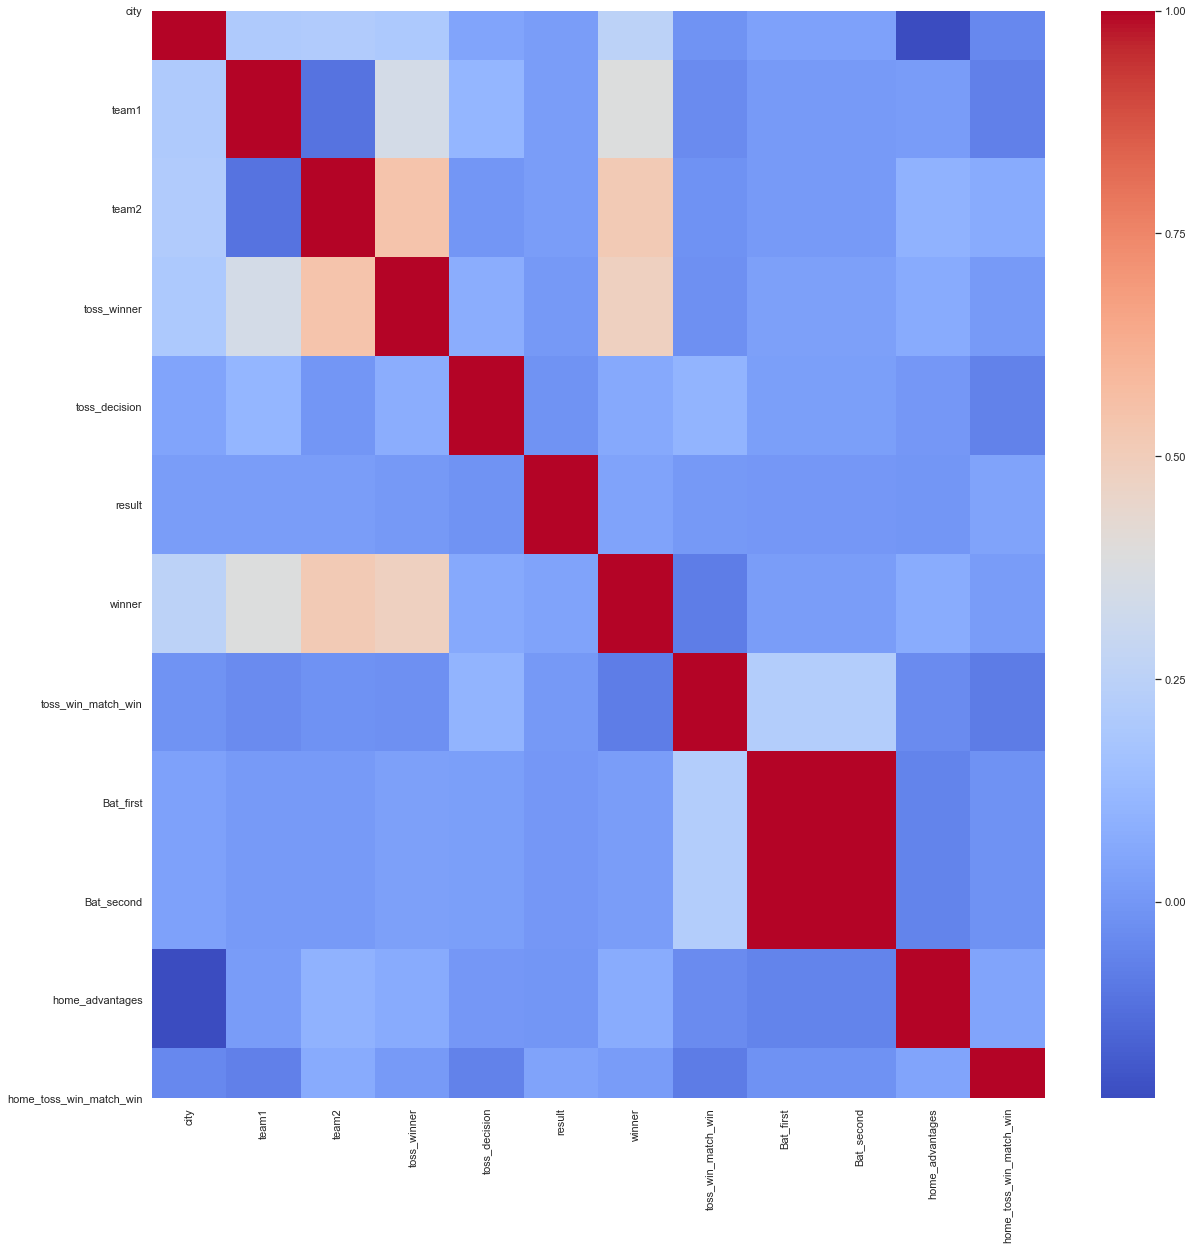

In [645]:
corre = matches_home.corr()
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(corre,
           cmap='coolwarm',
           xticklabels=corre.columns.values,
           yticklabels=corre.columns.values)

### Toss Win Match Win Prediction

### Train Test Split

Let's split up the data into a training set and a test set!

In [646]:
from sklearn.model_selection import train_test_split

In [647]:
X = matches_home[['team1','team2','toss_winner','winner']]
y = matches_home[['toss_win_match_win']]

In [648]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

In [649]:
from sklearn.linear_model import LogisticRegression

In [650]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [651]:
predictions = logmodel.predict(X_test)

### Evaluation


In [652]:
from sklearn.metrics import classification_report

In [653]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.47      0.39      0.43        66
           1       0.57      0.65      0.61        83

    accuracy                           0.54       149
   macro avg       0.52      0.52      0.52       149
weighted avg       0.53      0.54      0.53       149



In [654]:
from sklearn.metrics import classification_report,confusion_matrix

In [655]:
print(confusion_matrix(y_test,predictions))

[[26 40]
 [29 54]]


### KNN

In [656]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores_list = []
k_range=range(1,26)
scores={}
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [657]:
print(sum(scores_list)/len(scores_list))

0.8748993288590603


In [658]:
#print(confusion_matrix(y_test,y_pred))

In [659]:
from sklearn.metrics import classification_report

In [660]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.47      0.39      0.43        66
           1       0.57      0.65      0.61        83

    accuracy                           0.54       149
   macro avg       0.52      0.52      0.52       149
weighted avg       0.53      0.54      0.53       149



### Random Forest model


Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [661]:
from sklearn.ensemble import RandomForestClassifier

In [662]:
rfc = RandomForestClassifier(n_estimators=600)

In [663]:
rfc.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predictions and Evaluation

In [664]:
predictions = rfc.predict(X_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [665]:
from sklearn.metrics import classification_report,confusion_matrix

In [666]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        66
           1       0.99      0.99      0.99        83

    accuracy                           0.99       149
   macro avg       0.99      0.99      0.99       149
weighted avg       0.99      0.99      0.99       149



## Bat first match win prediction

In [720]:
matches_home.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 745 entries, 0 to 755
Data columns (total 12 columns):
city                       745 non-null float64
team1                      745 non-null int64
team2                      745 non-null int64
toss_winner                745 non-null int64
toss_decision              745 non-null int64
result                     745 non-null int64
winner                     745 non-null float64
toss_win_match_win         745 non-null int64
Bat_first                  745 non-null int64
Bat_second                 745 non-null int64
home_advantages            745 non-null int64
home_toss_win_match_win    745 non-null int64
dtypes: float64(2), int64(10)
memory usage: 75.7 KB


In [721]:
from sklearn.model_selection import train_test_split


In [722]:
#X = matches_home.drop(['winner'], axis=1)
X = matches_home[['team1','team2','toss_winner','toss_decision','result','Bat_first']]
y = matches_home[['winner']]
print(X.shape)

(745, 6)


In [723]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

In [724]:
from sklearn.linear_model import LogisticRegression

In [725]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [726]:
predictions = logmodel.predict(X_test)

### Evaluation

In [727]:
from sklearn.metrics import classification_report

In [728]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.27      0.39      0.32        23
         2.0       0.00      0.00      0.00         4
         3.0       0.10      0.20      0.13        10
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00        17
         6.0       0.00      0.00      0.00         2
         7.0       0.04      0.08      0.05        12
         8.0       0.17      0.21      0.19        24
         9.0       0.00      0.00      0.00         4
        10.0       0.00      0.00      0.00        19
        11.0       0.00      0.00      0.00         3
        12.0       0.14      0.24      0.17        17
        13.0       0.62      0.38      0.48        13

    accuracy                           0.17       149
   macro avg       0.10      0.12      0.10       149
weighted avg       0.15      0.17      0.15       149



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [729]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.27      0.39      0.32        23
         2.0       0.00      0.00      0.00         4
         3.0       0.10      0.20      0.13        10
         4.0       0.00      0.00      0.00         1
         5.0       0.00      0.00      0.00        17
         6.0       0.00      0.00      0.00         2
         7.0       0.04      0.08      0.05        12
         8.0       0.17      0.21      0.19        24
         9.0       0.00      0.00      0.00         4
        10.0       0.00      0.00      0.00        19
        11.0       0.00      0.00      0.00         3
        12.0       0.14      0.24      0.17        17
        13.0       0.62      0.38      0.48        13

    accuracy                           0.17       149
   macro avg       0.10      0.12      0.10       149
weighted avg       0.15      0.17      0.15       149



### KNN

In [730]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores_list = []
k_range=range(1,26)
scores={}
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [731]:
print(sum(scores_list)/len(scores_list))

0.49637583892617454


In [732]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.44      0.52      0.48        23
         2.0       0.00      0.00      0.00         4
         3.0       0.18      0.40      0.25        10
         4.0       0.00      0.00      0.00         1
         5.0       0.38      0.29      0.33        17
         6.0       0.00      0.00      0.00         2
         7.0       0.32      0.50      0.39        12
         8.0       0.44      0.46      0.45        24
         9.0       0.00      0.00      0.00         4
        10.0       0.30      0.16      0.21        19
        11.0       0.00      0.00      0.00         3
        12.0       0.31      0.47      0.37        17
        13.0       0.67      0.15      0.25        13

    accuracy                           0.34       149
   macro avg       0.23      0.23      0.21       149
weighted avg       0.35      0.34      0.32       149



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [681]:
# print(confusion_matrix(y_test,y_pred))

### Random Forest model

In [682]:
from sklearn.ensemble import RandomForestClassifier

In [683]:
rfc = RandomForestClassifier(n_estimators=600)

In [684]:
rfc.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predictions and Evaluation

In [685]:
predictions = rfc.predict(X_test)

In [686]:
from sklearn.metrics import classification_report,confusion_matrix

In [687]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.86      1.00      0.93        19
         2.0       1.00      0.67      0.80         3
         3.0       1.00      0.76      0.87        17
         4.0       1.00      1.00      1.00         2
         5.0       0.75      1.00      0.86        12
         6.0       0.00      0.00      0.00         1
         7.0       0.85      0.94      0.89        18
         8.0       0.89      0.92      0.91        26
         9.0       0.00      0.00      0.00         2
        10.0       0.88      0.94      0.91        16
        11.0       1.00      0.33      0.50         3
        12.0       1.00      0.94      0.97        16
        13.0       0.93      0.93      0.93        14

    accuracy                           0.89       149
   macro avg       0.78      0.73      0.74       149
weighted avg       0.89      0.89      0.88       149



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Home Advantage

In [688]:
X = matches_home.drop(['winner'], axis=1)
# X = matches_home[['city','team1','team2','home_advantages']]
y = matches_home[['winner']]

In [689]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

In [690]:
from sklearn.linear_model import LogisticRegression

In [691]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [692]:
predictions = logmodel.predict(X_test)

### Evaluation


In [693]:
from sklearn.metrics import classification_report

In [694]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.46      0.65      0.54        20
         2.0       0.00      0.00      0.00         6
         3.0       0.67      0.15      0.25        13
         4.0       0.00      0.00      0.00         4
         5.0       0.39      0.47      0.42        15
         6.0       0.00      0.00      0.00         1
         7.0       0.12      0.25      0.17        16
         8.0       0.10      0.07      0.08        29
         9.0       0.00      0.00      0.00         2
        10.0       0.00      0.00      0.00        17
        11.0       0.00      0.00      0.00         4
        12.0       0.18      0.20      0.19        15
        13.0       0.27      0.57      0.36         7

    accuracy                           0.23       149
   macro avg       0.17      0.18      0.15       149
weighted avg       0.22      0.23      0.21       149



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### KNN

In [695]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores_list = []
k_range=range(1,26)
scores={}
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [696]:
print(sum(scores_list)/len(scores_list))

0.4053691275167786


In [697]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.48      0.50      0.49        20
         2.0       0.00      0.00      0.00         6
         3.0       0.24      0.31      0.27        13
         4.0       0.00      0.00      0.00         4
         5.0       0.44      0.47      0.45        15
         6.0       0.00      0.00      0.00         1
         7.0       0.21      0.31      0.25        16
         8.0       0.55      0.38      0.45        29
         9.0       0.00      0.00      0.00         2
        10.0       0.31      0.29      0.30        17
        11.0       0.00      0.00      0.00         4
        12.0       0.22      0.40      0.29        15
        13.0       0.00      0.00      0.00         7

    accuracy                           0.32       149
   macro avg       0.19      0.20      0.19       149
weighted avg       0.32      0.32      0.31       149



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Random Forest model

In [698]:
from sklearn.ensemble import RandomForestClassifier

In [699]:
rfc = RandomForestClassifier(n_estimators=600)

In [700]:
rfc.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predictions and Evaluation

In [701]:
predictions = rfc.predict(X_test)

In [702]:
from sklearn.metrics import classification_report,confusion_matrix

In [703]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       0.80      0.67      0.73         6
         3.0       0.87      1.00      0.93        13
         4.0       0.75      0.75      0.75         4
         5.0       0.80      0.80      0.80        15
         6.0       0.00      0.00      0.00         1
         7.0       1.00      0.94      0.97        16
         8.0       0.85      0.97      0.90        29
         9.0       0.50      0.50      0.50         2
        10.0       0.81      0.76      0.79        17
        11.0       1.00      0.50      0.67         4
        12.0       0.93      0.93      0.93        15
        13.0       1.00      1.00      1.00         7

    accuracy                           0.89       149
   macro avg       0.79      0.76      0.77       149
weighted avg       0.88      0.89      0.88       149



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Home Toss Win Match Win

In [704]:
X = matches_home.drop(['winner'], axis=1)
#X = matches_home[['team1','team2','toss_winner','home_advantages','toss_win_match_win','home_toss_win_match_win']]
y = matches_home[['winner']]

In [705]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Logistic Regression

### Building a Logistic Regression model

In [706]:
from sklearn.linear_model import LogisticRegression

In [707]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [708]:
predictions = logmodel.predict(X_test)

### Evaluation

In [709]:
from sklearn.metrics import classification_report

In [710]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.20      0.50      0.28        16
         2.0       0.00      0.00      0.00         6
         3.0       1.00      0.14      0.25        21
         4.0       0.00      0.00      0.00         3
         5.0       0.10      0.10      0.10        20
         6.0       0.00      0.00      0.00         3
         7.0       0.27      0.20      0.23        20
         8.0       0.15      0.24      0.18        17
        10.0       0.17      0.14      0.15        14
        11.0       0.00      0.00      0.00         2
        12.0       0.16      0.27      0.20        15
        13.0       0.17      0.08      0.11        12

    accuracy                           0.19       149
   macro avg       0.18      0.14      0.13       149
weighted avg       0.27      0.19      0.17       149



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### KNN

In [711]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
scores_list = []
k_range=range(1,26)
scores={}
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pl

In [712]:
print(sum(scores_list)/len(scores_list))

0.4045637583892618


In [713]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         1.0       0.33      0.56      0.42        16
         2.0       0.00      0.00      0.00         6
         3.0       0.38      0.29      0.32        21
         4.0       0.00      0.00      0.00         3
         5.0       0.36      0.40      0.38        20
         6.0       0.00      0.00      0.00         3
         7.0       0.29      0.35      0.32        20
         8.0       0.17      0.29      0.22        17
        10.0       0.29      0.29      0.29        14
        11.0       0.00      0.00      0.00         2
        12.0       0.31      0.33      0.32        15
        13.0       0.00      0.00      0.00        12

    accuracy                           0.30       149
   macro avg       0.18      0.21      0.19       149
weighted avg       0.25      0.30      0.27       149



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Random Forest model

In [714]:
from sklearn.ensemble import RandomForestClassifier

In [715]:
rfc = RandomForestClassifier(n_estimators=600)

In [716]:
rfc.fit(X_train,y_train)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Predictions and Evaluation


In [717]:
predictions = rfc.predict(X_test)

In [718]:
from sklearn.metrics import classification_report,confusion_matrix

In [719]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         1.0       0.89      1.00      0.94        16
         2.0       0.71      0.83      0.77         6
         3.0       0.81      0.81      0.81        21
         4.0       1.00      0.67      0.80         3
         5.0       0.77      0.85      0.81        20
         6.0       0.00      0.00      0.00         3
         7.0       1.00      0.90      0.95        20
         8.0       0.94      0.94      0.94        17
        10.0       0.74      1.00      0.85        14
        11.0       0.00      0.00      0.00         2
        12.0       0.88      0.93      0.90        15
        13.0       1.00      0.75      0.86        12

    accuracy                           0.86       149
   macro avg       0.73      0.72      0.72       149
weighted avg       0.84      0.86      0.85       149



C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Deliveries Analysis

In [256]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,player_of_match,venue,umpire1,umpire2,umpire3,toss_win_match_win,Bat_first,Bat_second,home_advantages,home_toss_win_match_win
0,1.0,2017.0,13.0,2017-04-05,13,12,12,2,2,0.0,...,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,0,0,0,1,0
1,2.0,2017.0,11.0,2017-04-06,8,11,11,2,2,0.0,...,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,1,1,1,1,1
2,3.0,2017.0,4.0,2017-04-07,4,7,7,2,2,0.0,...,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,1,1,1,0,0
3,4.0,2017.0,5.0,2017-04-08,11,5,5,2,2,0.0,...,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,1,1,1,1,1
4,5.0,2017.0,12.0,2017-04-08,12,3,12,1,2,0.0,...,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,1,0,0,1,1


In [257]:
matches.tail(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,player_of_match,venue,umpire1,umpire2,umpire3,toss_win_match_win,Bat_first,Bat_second,home_advantages,home_toss_win_match_win
751,11347.0,2019.0,8.0,05/05/19,7,8,8,2,2,0.0,...,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,1,1,1,1,1
752,11412.0,2019.0,1.0,07/05/19,1,8,1,1,2,0.0,...,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,0,1,1,0,1
753,11413.0,2019.0,13.0,08/05/19,13,3,3,2,2,0.0,...,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,1,1,1,0,0
754,11414.0,2019.0,13.0,10/05/19,3,1,1,2,2,0.0,...,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,1,1,1,0,0
755,11415.0,2019.0,13.0,12/05/19,8,1,8,1,2,0.0,...,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,1,0,0,0,0


In [258]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [259]:
deliveries.tail(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179077,11415,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,0,0,0,SN Thakur,lbw,NaN


In [261]:
#Check for missing values in deliveries
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

We will not be using the player_dismissed, dismissal_kind and fielder in our analysis hence will drop these columns

In [262]:
#Dropping player_dismissed, dismissal_kind and fielder columns
deliveries.drop(['player_dismissed', 'dismissal_kind', 'fielder'],axis=1, inplace=True)

In [263]:
deliveries.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

We will merge season column from matches dataframe to deliveries dataframe to carryout analysis on deliveries.

In [264]:
#Merge season column from matches df to deliveries df
delivery_match = matches[['id','season']].merge(deliveries,left_on='id', right_on='match_id',how='left').drop('id',axis=1)

In [265]:
delivery_match.columns

Index(['season', 'match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object')

**What makes IPL so popular?**

In [266]:
def barplot(x_axis, y_axis, data_plot, title, x_label, y_label):
    plot=sns.barplot(x=x_axis, y=y_axis, data=data_plot)
    plot.set(xlabel=x_label, ylabel=y_label)
    plot.set_title(title)
    plt.show()

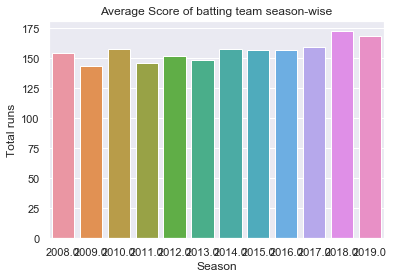

In [267]:
#Average score of batting team season-wise
match_score=delivery_match.groupby(['match_id','season','batting_team'])['total_runs'].sum().reset_index()
avg_score_season=match_score.groupby(['season'])['total_runs'].mean().reset_index()
barplot('season','total_runs',avg_score_season,'Average Score of batting team season-wise',
        'Season','Total runs')

Average score of teams was highest in 2018

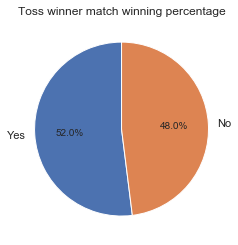

In [270]:
# Toss winner match winning percentage
winner=matches[matches['toss_winner']==matches['winner']]
labels=['Yes','No']
plt.pie([len(winner),(756-len(winner))],labels=labels,autopct='%1.1f%%',startangle=90)
plot=plt.gcf()
plt.title('Toss winner match winning percentage')
plt.show()

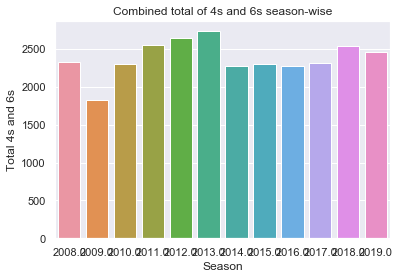

In [271]:
#Combined total of 4s and 6s season-wise
bou_six = delivery_match[(delivery_match['batsman_runs']==4) | (delivery_match['batsman_runs']==6)].groupby(['season'])['batsman_runs'].count().reset_index()
barplot('season', 'batsman_runs', bou_six, 'Combined total of 4s and 6s season-wise',
        'Season', 'Total 4s and 6s')

From the 3 plots above, we can infer three factors behind the popularity of Indian Premier League (IPL)

 - Average score is high in every season
 
The run rate would usually not be as high as this format in a 50 over or a test match. Average innings score in 120 balls played here will be more than 140.

- A match can be unpredictable

Toss is a big factor in a cricket game as the team that wins the toss has high chances of winning. But we can infer from the plot that the match can go either way where winners of tosses have very slight advantage.

-  Huge number of boundaries(4s and 6s) are hit

Over 2000 boundaries (4s and 6s) are scored in each season which is another explanation for high-score games and making the match fun to watch. South Africa hosted IPL in 2009 and it wasn't a big success because the pitches in South Africa weren't ideal for scoring many runs / boundaries.The position of the league played at can be attributed to less amount of boundaries in the year 2009. 

IPL has huge cricket fan base because of many high voltage matches and one cannot predict the match winner untill very end ball. These things make this league super famous and attracts many fans. 

**__Which team is winning the high scoring matches?__**

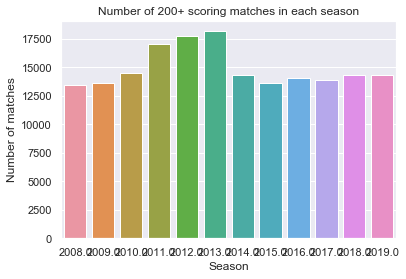

In [273]:
#sum of scores by batting and bowling teams
scores = delivery_match.groupby(['match_id','season','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
#Matches where score is greater than 200
scores = scores[scores['total_runs']>=200]
barplot('season', 'match_id', delivery_match.groupby(['season'])['match_id'].count().reset_index(), 
        'Number of 200+ scoring matches in each season', 'Season', 'Number of matches')


The first season had more than 10 200 + scores which contributes to the immediate success of the league. The second season has the lowest because it was held in South Africa.The 2018 season had the largest number of matches where more than 200 runs are scored. High match scores lead to the league's performance.


In [275]:
scores = deliveries.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
#First innings high score
score_firstinn = scores[scores['inning']==1]
#Second innings high score
score_secondinn = scores[scores['inning']==2]
#Full match score
score_fullmatch = score_firstinn.merge(score_secondinn[['match_id', 'inning', 'total_runs']], on='match_id')

In [276]:
score_fullmatch.rename(columns={'inning_y':'inning_2','total_runs_x':'inning1_runs','inning_x':'inning_1','total_runs_y':'inning2_runs'},inplace=True)
score_fullmatch = score_fullmatch[score_fullmatch['inning1_runs']>=200]

#new column to check if the score was chased successfully or not
score_fullmatch['successful_chase'] = 1
score_fullmatch['successful_chase'] = np.where(score_fullmatch['inning1_runs']<=score_fullmatch['inning2_runs'], 'yes', 'no')

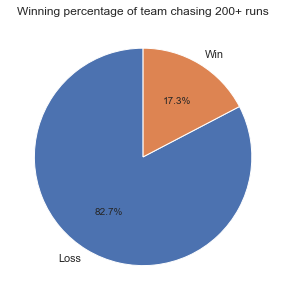

In [277]:
#Vizualisation of success rate of teams batting second
counts = score_fullmatch['successful_chase'].value_counts().reset_index().successful_chase
labels = ['Loss','Win']
plt.pie(counts,labels=labels,autopct='%1.1f%%', startangle=90)
plot = plt.gcf()
plot.set_size_inches(5,5)
plt.title("Winning percentage of team chasing 200+ runs")
plt.show()

There is just 17.3% chance for the team chasing 200+ runs. This clearlys shows that high scoring team with batting first have high chance of winning the match.

**Bowlers who excel better in powerplay and death overs.Which bowlers will be best bid during future auctions?**

In [278]:
#powerplay overs are from 0-6,we will split them.
powerplay=delivery_match[delivery_match['over']<=6].reset_index()

To get the average number of runs conceded by bowler for each over bowled we need to look at the economy rate of them. So we
will add one more column 'Economy Rate'

In [279]:
bowl=powerplay.groupby(['over','season','bowler','match_id']).sum().reset_index()
#new column showing total number of overs bowled
bowl['total_overs']=1
bowl=bowl[['bowler','total_overs','total_runs','season']]
bowl=bowl.groupby(['bowler','season']).sum().reset_index()
#new column showing economy rate of bowler
bowl['economy_rate']=bowl.apply(lambda row: '{:.2f}'.format(row['total_runs']/row['total_overs']),axis=1)
bowl.head()

,bowler,season,total_overs,total_runs,economy_rate
0,A Ashish Reddy,2012.0,1,20,20.00
1,A Chandila,2012.0,7,41,5.86
2,A Chandila,2013.0,17,98,5.76
3,A Choudhary,2017.0,6,46,7.67
4,A Dananjaya,2018.0,1,12,12.00


In [280]:
#best economic bowler in powerplay from all seasons combined
bowl.nlargest(10,'total_overs').sort_values(by=['economy_rate'],ascending=True)

,bowler,season,total_overs,total_runs,economy_rate
643,P Kumar,2013.0,37,214,5.78
289,GD McGrath,2008.0,37,218,5.89
142,B Kumar,2016.0,36,218,6.06
557,MG Johnson,2013.0,39,243,6.23
642,P Kumar,2012.0,43,278,6.47
646,P Kumar,2016.0,38,253,6.66
27,A Nehra,2015.0,42,297,7.07
334,I Sharma,2013.0,38,278,7.32
593,MS Gony,2008.0,45,342,7.60
244,DL Chahar,2019.0,50,384,7.68


From above table we can see that Praveen kumar is all time economic bowler.These results are good but we need to look at
economy rate season-wise since all bowlers wont play in every season.

Top 3 economic bowler during powerplay season-wise

In [281]:
#top 3 economic bowler during powerplay season-wise
x,y=2008,2019
while x <= y:
    print(bowl[bowl['season']==x].nlargest(3,'total_overs').sort_values(by=['economy_rate'],ascending=True))
    x+=1

          bowler  season  total_overs  total_runs economy_rate
289   GD McGrath  2008.0           37         218         5.89
593      MS Gony  2008.0           45         342         7.60
826  S Sreesanth  2008.0           36         293         8.14
        bowler  season  total_overs  total_runs economy_rate
770   RP Singh  2009.0           35         233         6.66
22     A Nehra  2009.0           28         190         6.79
411  JH Kallis  2009.0           29         205         7.07
        bowler  season  total_overs  total_runs economy_rate
640    P Kumar  2010.0           28         210         7.50
277   DW Steyn  2010.0           27         204         7.56
1024    Z Khan  2010.0           24         190         7.92
        bowler  season  total_overs  total_runs economy_rate
641    P Kumar  2011.0           35         236         6.74
772   RP Singh  2011.0           33         225         6.82
1025    Z Khan  2011.0           33         227         6.88
        bowler  

From above numbers, we can see that Praveen kumar(P Kumar) and Bhuvaneshwar Kumar(B Kumar) are consistent bowlers during
powerplay throughout the seasons.

Now we will look at economic bowlers during death overs.

In [282]:
deathover=delivery_match[delivery_match['over']>=16].reset_index()

In [283]:
bowl=deathover.groupby(['over','season','bowler','match_id']).sum().reset_index()
#new column showing total number of overs bowled
bowl['total_overs']=1
bowl=bowl[['total_overs','total_runs','bowler','season']]
bowl=bowl.groupby(['bowler','season']).sum().reset_index()
#new column showing economy rate of bowler
bowl["economy_rate"] = bowl.apply(lambda row: "{:.2f}".format(row["total_runs"] / row["total_overs"]), axis=1)
bowl.head()

,bowler,season,total_overs,total_runs,economy_rate
0,A Ashish Reddy,2012.0,13,124,9.54
1,A Ashish Reddy,2013.0,2,25,12.50
2,A Ashish Reddy,2015.0,3,20,6.67
3,A Chandila,2013.0,1,6,6.00
4,A Choudhary,2017.0,4,40,10.00


In [284]:
#best economic bowler in deathovers from all seasons combined
bowl.nlargest(10,'total_overs').sort_values(by=['economy_rate'],ascending=False)

,bowler,season,total_overs,total_runs,economy_rate
140,B Kumar,2016.0,27,259,9.59
416,JJ Bumrah,2019.0,30,263,8.77
414,JJ Bumrah,2017.0,28,241,8.61
228,DJ Bravo,2015.0,36,303,8.42
806,S Kaul,2018.0,28,233,8.32
227,DJ Bravo,2013.0,37,286,7.73
615,Mustafizur Rahman,2016.0,27,208,7.70
882,SP Narine,2014.0,28,189,6.75
230,DJ Bravo,2018.0,29,344,11.86
229,DJ Bravo,2016.0,27,307,11.37


We can see from the analysis that economic bowlers during powerplay and deathovers are different. This is the reason bowlers
excel in their strength across the overs.

In [285]:
#top 3 economic bowler during deathover season-wise
x, y = 2008, 2019
while x <= y:
    print(bowl[bowl["season"]==x].nlargest(3, 'total_overs').sort_values(by=["economy_rate"], ascending=True))
    x+=1

            bowler  season  total_overs  total_runs economy_rate
774       RP Singh  2008.0           17         176        10.35
931  Sohail Tanvir  2008.0           18         122         6.78
378      JA Morkel  2008.0           15         141         9.40
         bowler  season  total_overs  total_runs economy_rate
863  SL Malinga  2009.0           22         135         6.14
775    RP Singh  2009.0           22         163         7.41
343   IK Pathan  2009.0           23         195         8.48
            bowler  season  total_overs  total_runs economy_rate
738  R Vinay Kumar  2010.0           16         165        10.31
344      IK Pathan  2010.0           16         170        10.62
864     SL Malinga  2010.0           19         135         7.11
            bowler  season  total_overs  total_runs economy_rate
865     SL Malinga  2011.0           24         156         6.50
220   DE Bollinger  2011.0           22         144         6.55
1031        Z Khan  2011.0           

Bowlers like SL Malinga, B Kumar, DJ Bravo are performing extremely good during deathovers across all seasons. If IPL team
owners want to have best bowling side then should definitely bid for Bhuvaneshwar Kumar(B Kumar), SL Malinga, DJ Bravo,DL Chahar